# **Training the model**

**Import Data**

In [ ]:
import pandas as pd

train_df = pd.read_excel("Telco_customer_churn.xlsx")
train_df.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices


**Categorized numeric data is used to build models**

In [ ]:
test_inputs = train_df[["Tenure Months","Monthly Charges","Total Charges", "Churn Score"]]
y_actual = train_df["Churn Value"]

test_inputs = test_inputs.apply(pd.to_numeric, errors='coerce')
test_inputs.fillna(test_inputs.mean(), inplace=True)

**Using two prediction models**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
import numpy

lr_classifier = LogisticRegression(solver='lbfgs',max_iter=10000)
mlp_classifier = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(8, 2), random_state=11,max_iter=10000)

lr_classifier.fit(test_inputs.to_numpy(),y_actual.to_numpy())
mlp_classifier.fit(test_inputs.to_numpy(),y_actual.to_numpy())

MLPClassifier(alpha=1e-05, hidden_layer_sizes=(8, 2), max_iter=10000,
              random_state=11, solver='lbfgs')

**Comparing the accuracy of the two models**

In [ ]:
from sklearn.metrics import accuracy_score

y_predicted_lr = lr_classifier.predict(test_inputs.to_numpy())
lr_accuracy_score = accuracy_score(y_predicted_lr,y_actual)

y_predicted_mlp = mlp_classifier.predict(test_inputs.to_numpy())
mlp_accuracy_score = accuracy_score(y_predicted_mlp,y_actual)

print (f"Accuracy of the Logistic Classifier = {lr_accuracy_score}")
print (f"Accuracy of the MLP Classifier = {mlp_accuracy_score}")

Accuracy of the Logistic Classifier = 0.9062899332670737
Accuracy of the MLP Classifier = 0.7346301292063041


**Save the high accuracy model**

In [ ]:
import pickle

file_to_write = open("Churn_best_model.saved","wb")
pickle.dump(lr_classifier,file_to_write)
file_to_write.close()

**Classify users with a Churn Value of 0 and predict the probability of a Churn Value of 1**

In [ ]:
import pandas as pd
import pickle

input_data = pd.read_excel("Telco_customer_churn.xlsx")
test_data = input_data[input_data["Churn Value"] == 0]

test_inputs = test_data[["Tenure Months","Monthly Charges","Total Charges", "Churn Score"]]

test_inputs = test_inputs.apply(pd.to_numeric, errors='coerce')
test_inputs.fillna(test_inputs.mean(), inplace=True)

model_file = open("Churn_best_model.saved","rb")
model = pickle.load(model_file)
model_file.close()

data_array = test_inputs.to_numpy()
probabilities = model.predict_proba(data_array)
test_data["Prediction"] = probabilities[:, 1]
test_data.head()

<ipython-input-18-b280a54c8b3d>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data["Prediction"] = probabilities[:, 1]


,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason,Prediction
1869,7590-VHVEG,1,United States,California,Los Angeles,90001,"33.973616, -118.24902",33.973616,-118.249020,Female,...,Yes,Electronic check,29.85,29.85,No,0,27,3964,NaN,0.000093
1870,5575-GNVDE,1,United States,California,Los Angeles,90002,"33.949255, -118.246978",33.949255,-118.246978,Male,...,No,Mailed check,56.95,1889.5,No,0,61,3441,NaN,0.027171
1871,7795-CFOCW,1,United States,California,Los Angeles,90004,"34.076259, -118.310715",34.076259,-118.310715,Male,...,No,Bank transfer (automatic),42.30,1840.75,No,0,66,4307,NaN,0.024172
1872,1452-KIOVK,1,United States,California,Los Angeles,90007,"34.027337, -118.28515",34.027337,-118.285150,Male,...,Yes,Credit card (automatic),89.10,1949.4,No,0,43,4459,NaN,0.004582
1873,6713-OKOMC,1,United States,California,Los Angeles,90008,"34.008293, -118.346766",34.008293,-118.346766,Female,...,No,Mailed check,29.75,301.9,No,0,51,2013,NaN,0.006227


**Extract and export customers who are likely to be lost**

In [ ]:
danger_customer = test_data[test_data["Prediction"] >= 0.8]
danger_customer.head()
danger_customer.to_excel('Danger Customer.xlsx', index=False)

* Coefficient > 0 -- Increase churn
* Coefficient < 0 -- Reduce churn
* Odds Ratio -- The larger the absolute value, the stronger the impact

In [ ]:
import numpy as np
coeff_df = pd.DataFrame({'Feature': test_inputs.columns, 'Coefficient': model.coef_[0],})
coeff_df['Odds Ratio'] = np.exp(coeff_df['Coefficient'])
coeff_df = coeff_df.sort_values(by='Odds Ratio', ascending=False)
print(coeff_df)

           Feature  Coefficient  Odds Ratio
3      Churn Score     0.197051    1.217806
1  Monthly Charges     0.033293    1.033854
2    Total Charges    -0.000020    0.999980
0    Tenure Months    -0.056231    0.945321


# **Analysis**
* For every 1 point increase in Churn Score, the probability of customer churn increases by about 21.8%. Recommendation: List customers with high Churn Score as key intervention targets.
* For every $1 increase in monthly fees, the probability of customer churn increases by about 3.4%. Recommendation: Consider providing personalized discounts or enhancing the sense of service value for high monthly fee customers.
* For every 1 cent increase in total fees, the probability of customer churn decreases slightly. The effect is minimal, but tends to make long-term paying customers less likely to churn.
* For every 1 month increase in usage time, the probability of customer churn decreases by about 5.5%. This shows that old customers are more stable and new customers are more likely to churn.

**Calculate the reasons for customer churn**

In [ ]:
import pandas as pd
input_data = pd.read_excel("Telco_customer_churn.xlsx")
lose_customer = input_data[input_data["Churn Value"] == 1]

grouped_reason = lose_customer.groupby('Churn Reason').size()
for category, count in grouped_reason.items():
  print(f"Category: {category}, Count: {count}")

Category: Attitude of service provider, Count: 135
Category: Attitude of support person, Count: 192
Category: Competitor had better devices, Count: 130
Category: Competitor made better offer, Count: 140
Category: Competitor offered higher download speeds, Count: 189
Category: Competitor offered more data, Count: 162
Category: Deceased, Count: 6
Category: Don't know, Count: 154
Category: Extra data charges, Count: 57
Category: Lack of affordable download/upload speed, Count: 44
Category: Lack of self-service on Website, Count: 88
Category: Limited range of services, Count: 44
Category: Long distance charges, Count: 44
Category: Moved, Count: 53
Category: Network reliability, Count: 103
Category: Poor expertise of online support, Count: 19
Category: Poor expertise of phone support, Count: 20
Category: Price too high, Count: 98
Category: Product dissatisfaction, Count: 102
Category: Service dissatisfaction, Count: 89


# **Graph**
**Monthly Charges Comparison**

Text(0, 0.5, 'Frequency')

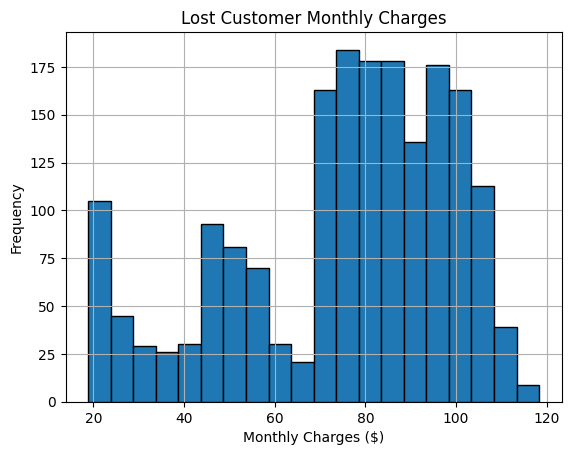

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
input_data = pd.read_excel("Telco_customer_churn.xlsx")
lose_customer = input_data[input_data["Churn Value"] == 1]
monthly_charges = lose_customer["Monthly Charges"]
monthly_charges.hist(bins=20, edgecolor='black')
plt.title("Lost Customer Monthly Charges")
plt.xlabel("Monthly Charges ($)")
plt.ylabel("Frequency")

Text(0, 0.5, 'Frequency')

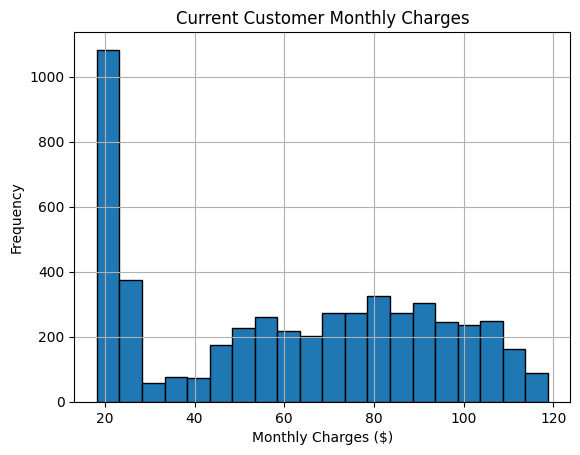

In [ ]:
current_customer = input_data[input_data["Churn Value"] == 0]
monthly_charges = current_customer["Monthly Charges"]
monthly_charges.hist(bins=20, edgecolor='black')
plt.title("Current Customer Monthly Charges")
plt.xlabel("Monthly Charges ($)")
plt.ylabel("Frequency")

Text(0, 0.5, 'Frequency')

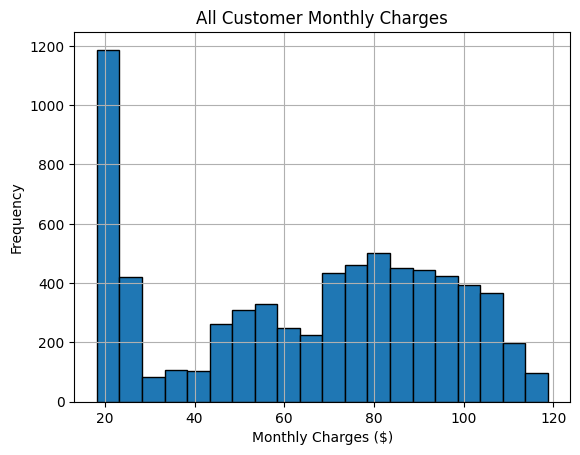

In [ ]:
monthly_charges = input_data["Monthly Charges"]
monthly_charges.hist(bins=20, edgecolor='black')
plt.title("All Customer Monthly Charges")
plt.xlabel("Monthly Charges ($)")
plt.ylabel("Frequency")

Churned customers tend to have higher monthly charges on average, with a noticeable concentration in the upper range (around $70–$100). On the other hand, retained customers show a broader spread across the lower and mid-range of charges, peaking around $20–$60. This pattern suggests that customers paying higher monthly charges are more likely to churn, possibly due to dissatisfaction with cost relative to perceived value. This insight could be crucial for churn prevention strategies—such as personalized discounts or targeted customer engagement for high-paying customers.

**Tenure Months Comparison**

Text(0, 0.5, 'Frequency')

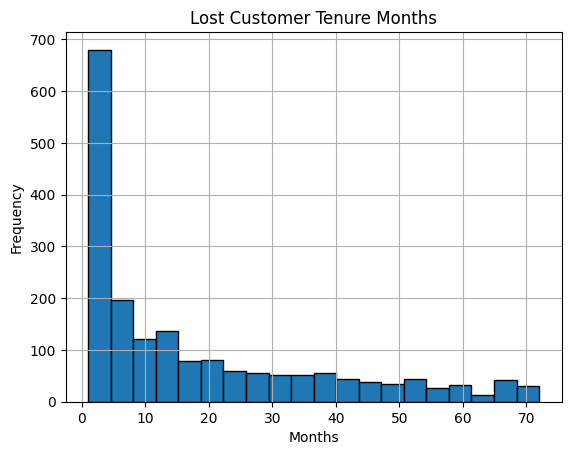

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
input_data = pd.read_excel("Telco_customer_churn.xlsx")
lose_customer = input_data[input_data["Churn Value"] == 1]
tenure_months = lose_customer["Tenure Months"]
tenure_months.hist(bins=20, edgecolor='black')
plt.title("Lost Customer Tenure Months")
plt.xlabel("Months")
plt.ylabel("Frequency")

Text(0, 0.5, 'Frequency')

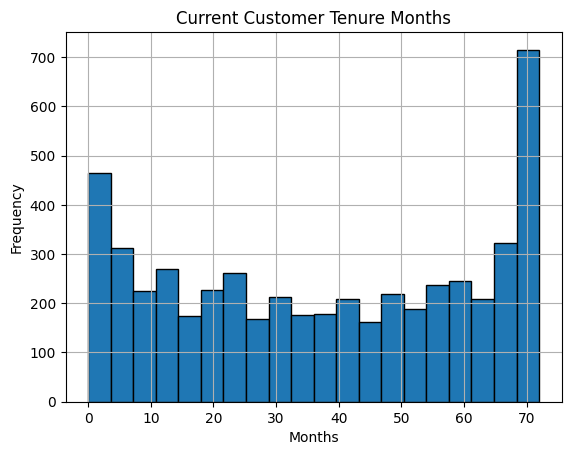

In [ ]:
current_customer = input_data[input_data["Churn Value"] == 0]
tenure_months = current_customer["Tenure Months"]
tenure_months.hist(bins=20, edgecolor='black')
plt.title("Current Customer Tenure Months")
plt.xlabel("Months")
plt.ylabel("Frequency")

Text(0, 0.5, 'Frequency')

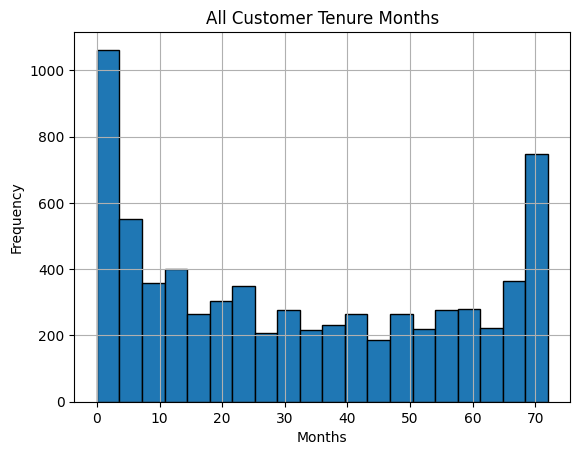

In [ ]:
tenure_months = input_data["Tenure Months"]
tenure_months.hist(bins=20, edgecolor='black')
plt.title("All Customer Tenure Months")
plt.xlabel("Months")
plt.ylabel("Frequency")

Customers who churned had significantly shorter tenure on average than those who were retained. This pattern strongly suggests that shorter tenure is correlated with higher churn risk. Because churned customers are heavily clustered toward low tenure values and retained customers are more evenly spread, with a noticeable peak around 60–70 months, this suggests that tenure is a strong predictor of churn—customers with lower tenure are much more likely to churn and retention strategies should prioritize engaging newer customers within their first year.

**Service Feedback Comparison**

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Tech Support'),
  Text(1, 0, 'Device Protection'),
  Text(2, 0, 'Online Backup'),
  Text(3, 0, 'Online Security')])

<Figure size 600x400 with 0 Axes>

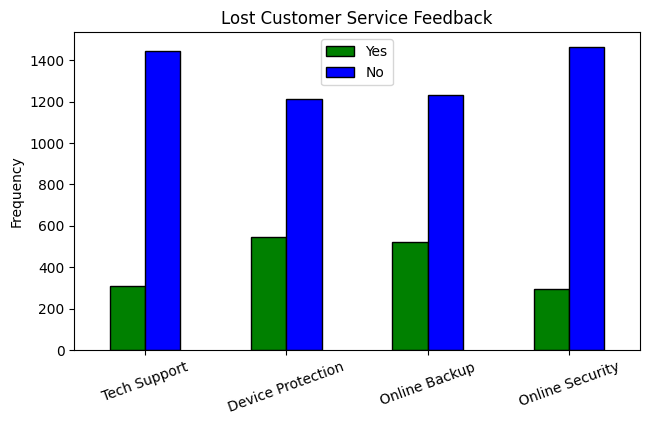

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
input_data = pd.read_excel("Telco_customer_churn.xlsx")
lose_customer = input_data[input_data["Churn Value"] == 1]
tech_support = lose_customer["Tech Support"].value_counts()
device_protection = lose_customer["Device Protection"].value_counts()
online_backup = lose_customer["Online Backup"].value_counts()
online_security = lose_customer["Online Security"].value_counts()

order = ["Yes", "No"]
tech_support = tech_support.reindex(order, fill_value=0)
device_protection = device_protection.reindex(order, fill_value=0)
online_backup = online_backup.reindex(order, fill_value=0)
online_security = online_security.reindex(order, fill_value=0)
combined = pd.DataFrame({"Tech Support": tech_support, "Device Protection": device_protection,
                         "Online Backup": online_backup,"Online Security": online_security})

transposed = combined.T
plt.figure(figsize=(6, 4))
transposed.plot(kind='bar', edgecolor='black', color=["green", "blue"])
plt.tight_layout()
plt.title("Lost Customer Service Feedback")
plt.ylabel("Frequency")
plt.xticks(rotation=20)

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Tech Support'),
  Text(1, 0, 'Device Protection'),
  Text(2, 0, 'Online Backup'),
  Text(3, 0, 'Online Security')])

<Figure size 600x400 with 0 Axes>

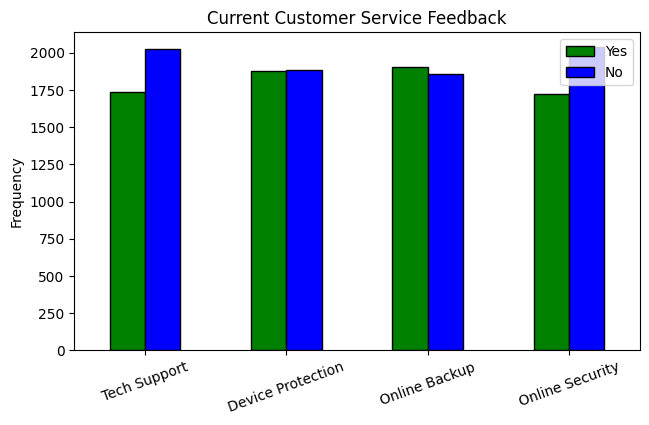

In [ ]:
current_customer = input_data[input_data["Churn Value"] == 0]
tech_support = current_customer["Tech Support"].value_counts()
device_protection = current_customer["Device Protection"].value_counts()
online_backup = current_customer["Online Backup"].value_counts()
online_security = current_customer["Online Security"].value_counts()

order = ["Yes", "No"]
tech_support = tech_support.reindex(order, fill_value=0)
device_protection = device_protection.reindex(order, fill_value=0)
online_backup = online_backup.reindex(order, fill_value=0)
online_security = online_security.reindex(order, fill_value=0)
combined = pd.DataFrame({"Tech Support": tech_support, "Device Protection": device_protection,
                         "Online Backup": online_backup,"Online Security": online_security})

transposed = combined.T
plt.figure(figsize=(6, 4))
transposed.plot(kind='bar', edgecolor='black', color=["green", "blue"])
plt.tight_layout()
plt.title("Current Customer Service Feedback")
plt.ylabel("Frequency")
plt.xticks(rotation=20)

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Tech Support'),
  Text(1, 0, 'Device Protection'),
  Text(2, 0, 'Online Backup'),
  Text(3, 0, 'Online Security')])

<Figure size 600x400 with 0 Axes>

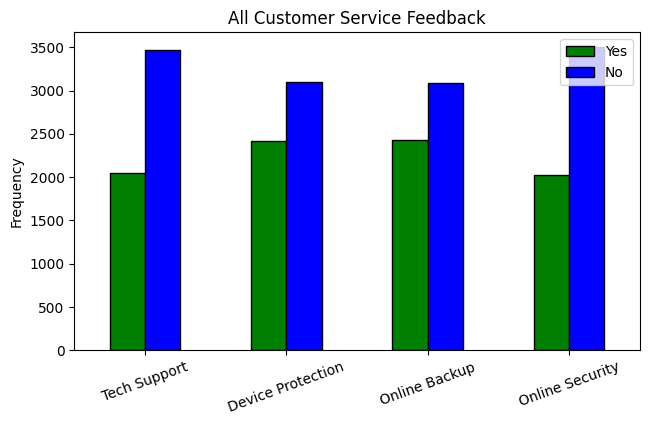

In [ ]:
tech_support = input_data["Tech Support"].value_counts()
device_protection = input_data["Device Protection"].value_counts()
online_backup = input_data["Online Backup"].value_counts()
online_security = input_data["Online Security"].value_counts()

order = ["Yes", "No"]
tech_support = tech_support.reindex(order, fill_value=0)
device_protection = device_protection.reindex(order, fill_value=0)
online_backup = online_backup.reindex(order, fill_value=0)
online_security = online_security.reindex(order, fill_value=0)
combined = pd.DataFrame({"Tech Support": tech_support, "Device Protection": device_protection,
                         "Online Backup": online_backup,"Online Security": online_security})

transposed = combined.T
plt.figure(figsize=(6, 4))
transposed.plot(kind='bar', edgecolor='black', color=["green", "blue"])
plt.tight_layout()
plt.title("All Customer Service Feedback")
plt.ylabel("Frequency")
plt.xticks(rotation=20)

Among lost customers, a larger proportion reported not subscribing to value-added services such as Tech Support, Device Protection, Online Backup, and Online Security. The bar chart shows significantly higher “No” counts in these categories. In comparison, current customers choose more balanced, which means they are more willing use these services. This difference shows that customers who do not engage with additional support or services are more able lost.

**Suggestion**

*   Predict users with a high probability of churn based on the model and provide them with special solutions.
*   Establish differentiated pricing strategies for customers in high-churn areas.
*   Provide exclusive benefits for customers 0-20 months and 24 months after joining the network to reduce early churn and consolidate later customers.
*   Optimize payment methods, promote automatic deductions, and reduce losses caused by payment methods.
*   Strictly upgrade staff's service training to ensure that customers can get a complete and satisfactory customer service and service experience.
*   On the premise of providing adequate services, vigorously promote the company's commercial products so that customers can fully experience the company's services and auxiliary projects.





